In [1]:
import pandas as pd
import matplotlib.pyplot as plt

all_model_parities = pd.read_csv('all_model_parities.csv').drop(columns=['Unnamed: 0'])
all_model_parities.head(3)

,Unnamed: 0.1,id,iso_639_3,language,glottocode,text,url,domain,topic,has_image,has_hyperlink,last_updated,parity,tokens,model
0,0,0,ace,Arab,achi1257,يق أورو سنين، اوق علمون دري فکولتس کدوکترن يون...,https://en.wikinews.org/wiki/Scientists_say_ne...,wikinews,health,yes,yes,1.0,2.155556,"['▁', 'يق', '▁', 'أورو', '▁', 'سنين،', '▁', 'ا...",flan-t5-xxl
1,1,1,ace,Arab,achi1257,ڤنليتي اوتام خن اترا ڽو موڠکين محسى ديتيکسي فو...,https://en.wikinews.org/wiki/Scientists_say_ne...,wikinews,health,yes,yes,1.0,2.307692,"['▁', 'ڤنليتي', '▁', 'اوتام', '▁', 'خن', '▁', ...",flan-t5-xxl
2,2,2,ace,Arab,achi1257,جاس ۳۹سي ݢريڤين مڤوق لندسن ڤاچو ليڠک ڤوه ۹:۳۰ ...,https://en.wikinews.org/wiki/Fighter_jet_crash...,wikinews,accident,yes,yes,1.0,2.181818,"['▁', 'جاس', '▁', '۳۹سي', '▁', 'ݢريڤين', '▁', ...",flan-t5-xxl


In [2]:
flores_parities = all_model_parities[['id', 'model', 'language', 'parity']]
flores_parities.head(3)

,id,model,language,parity
0,0,flan-t5-xxl,Arab,2.155556
1,1,flan-t5-xxl,Arab,2.307692
2,2,flan-t5-xxl,Arab,2.181818


In [3]:
flores_parities.drop(columns=['id']).describe()

,parity
count,1.956114e+06
mean,4.736041e+00
std,1.101716e+01
min,1.000000e+00
25%,2.052632e+00
50%,2.555556e+00
75%,3.571429e+00
max,5.820000e+02


In [4]:
# from `parity.ipynb`
names_for_csv = ['flan-t5-xxl', 
                 'mt0-xxl-mt',
                 'aya-101',
                 'bloomz-7b1',
                 'Phi-3.5-mini-instruct',
                 'Pangea-7B',
                 'gemma-7b',
                 'gemma-2-9b', 
                 'Llama-3.2-1B-Instruct']
parities_by_model = [flores_parities[flores_parities['model']==model]['parity'] for model in names_for_csv]

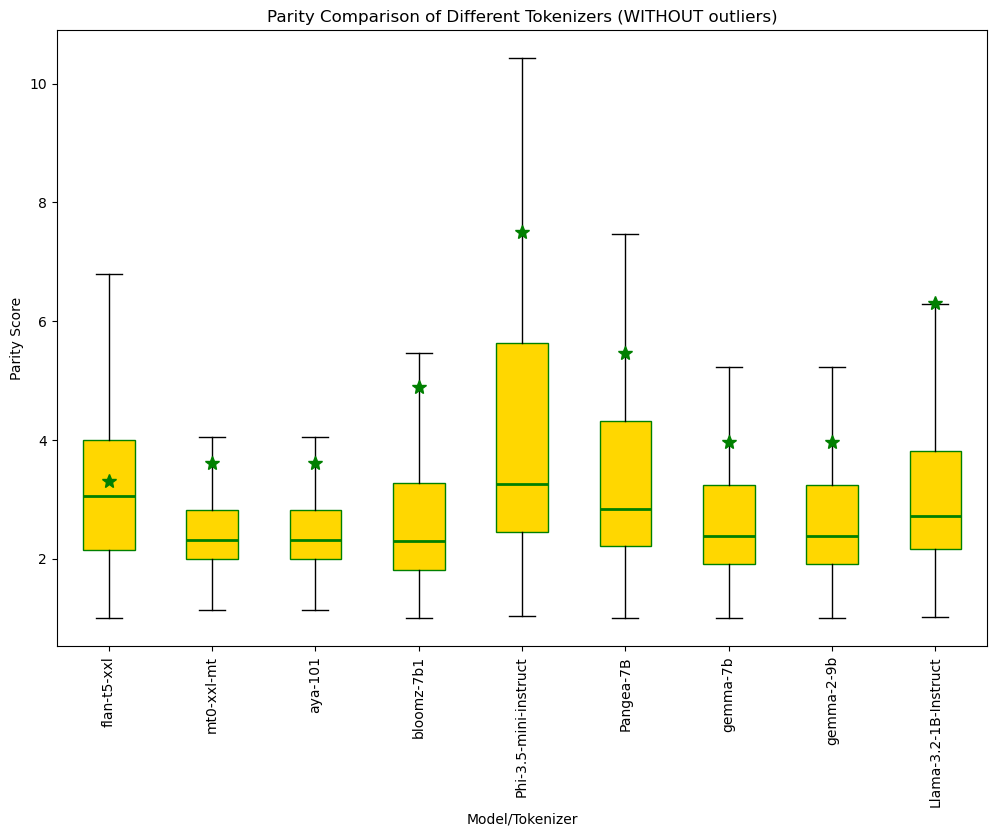

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
boxplot = ax.boxplot(parities_by_model, 
                     labels=names_for_csv, 
                     showfliers=False, patch_artist=True, showmeans=True,
                     meanprops={'marker': '*',
                                'markerfacecolor': 'green',
                                'markeredgecolor': 'green',
                                'markersize': 10})

for box in boxplot['boxes']:
    box.set(facecolor="gold", edgecolor="green")  

for median in boxplot['medians']:
    median.set(color="green", linewidth=2)  

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title('Parity Comparison of Different Tokenizers (WITHOUT outliers)')
plt.xlabel('Model/Tokenizer')
plt.ylabel('Parity Score')
plt.show()

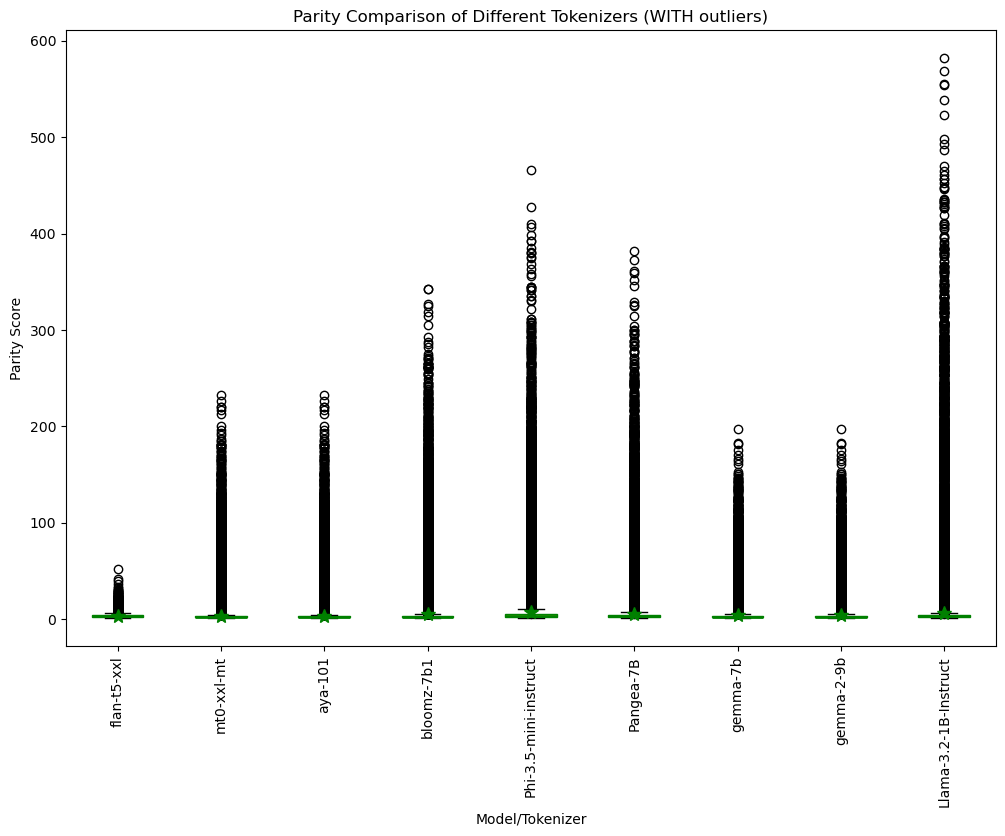

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
boxplot = ax.boxplot(parities_by_model, 
                     labels=names_for_csv, 
                     showfliers=True, patch_artist=True, showmeans=True,
                     meanprops={'marker': '*',
                                'markerfacecolor': 'green',
                                'markeredgecolor': 'green',
                                'markersize': 10})

for box in boxplot['boxes']:
    box.set(facecolor="gold", edgecolor="green")  

for median in boxplot['medians']:
    median.set(color="green", linewidth=2)  

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title('Parity Comparison of Different Tokenizers (WITH outliers)')
plt.xlabel('Model/Tokenizer')
plt.ylabel('Parity Score')
plt.show()